In [6]:
! pip install import-ipynb


In [7]:
import import_ipynb

importing Jupyter notebook from googletrendsABA_MSciProject.ipynb
  Cloning https://github.com/GeneralMills/pytrends to /private/var/folders/tf/50mx1bq91j7gsfdlgc40j37r0000gn/T/pip-req-build-qf3b15ca
  Running command git clone -q https://github.com/GeneralMills/pytrends /private/var/folders/tf/50mx1bq91j7gsfdlgc40j37r0000gn/T/pip-req-build-qf3b15ca
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done


/Users/andreeanistor/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'trends.google.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
/Users/andreeanistor/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'trends.google.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
/Users/andreeanistor/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'trends.google.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warning

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 261 entries, 2018-08-19 to 2023-08-13
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   /m/05wf1w  261 non-null    int64
 1   isPartial  261 non-null    bool 
dtypes: bool(1), int64(1)
memory usage: 4.3 KB
<class 'pandas.core.frame.DataFrame'>
Index: 261 entries, Week to 2023-07-23
Data columns (total 1 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Category: All categories  261 non-null    object
dtypes: object(1)
memory usage: 4.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     261 non-null    object
 1   Category: All categories  261 non-null    object
dtypes: object(2)
memory usage: 4.2+ KB
<class 

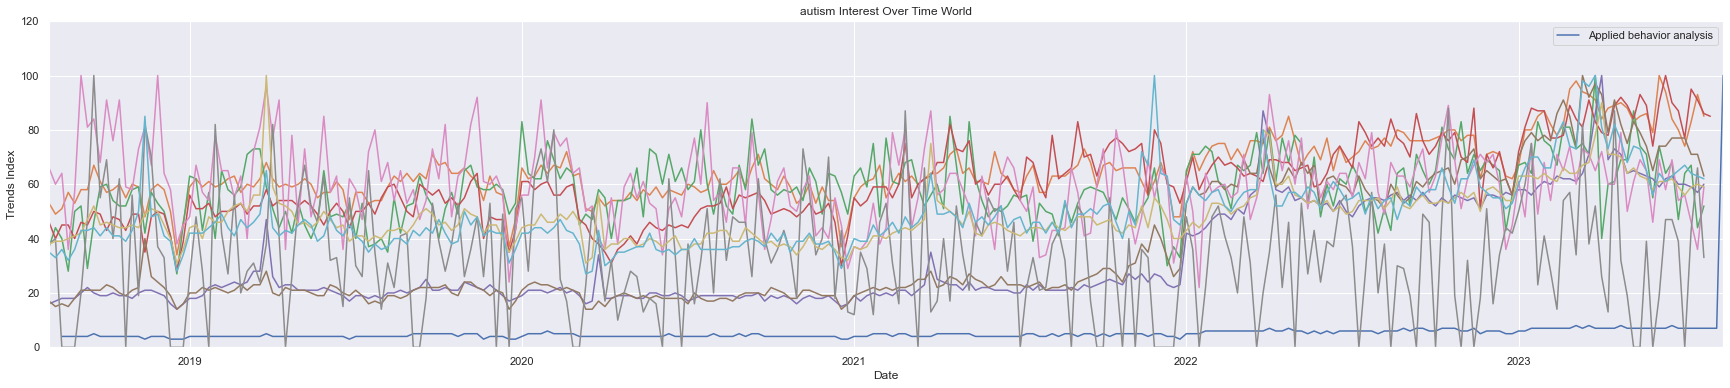

In [8]:
# import wordbank sets resulted from the google trends data analysis
from googletrendsABA_MSciProject import asd_wordbank_set, aba_wordbank_set

In [9]:
asd_wordbank_set

{'asd',
 'asd disorder',
 'asd spectrum',
 'asperger',
 'aspergers',
 'aspergers autism',
 'autism',
 'autism disorder',
 'autism spectrum',
 'autism spectrum disorder',
 'autistic',
 'autistic spectrum disorder',
 'autistic spectrum disorders',
 'high functioning autism',
 'high-functioning autism spectrum disorder',
 'neurodivergent'}

In [10]:
aba_wordbank_set

{'aba',
 'aba behavior',
 'aba behavior therapy',
 'aba behavioral therapy',
 'aba conversion therapy',
 'aba home therapy',
 'aba school',
 'aba services',
 'aba therapist',
 'aba therapy',
 'aba therapy center',
 'aba therapy school',
 'aba therapy services',
 'aba training',
 'aba tutor',
 'acceptance and commitment therapy',
 'applied behavior analysis',
 'applied behaviour analysis',
 'bcaba',
 'bcba',
 'behavior',
 'behavior analysis',
 'behavior analyst',
 'behavior technician',
 'behavior therapy',
 'behavioral analysis',
 'behavioral therapy',
 'behaviorism',
 'behaviour',
 'behaviour analysis',
 'behaviour technician',
 'behavioural analysis',
 'discrete trial training',
 'dtt',
 'rbt',
 'registered behavior technician',
 'registered behaviour technician'}

Reddit data is accessed via the Reddit API (documentation: https://www.reddit.com/dev/api/) using PRAW (Python Reddit API Wrapper - documentation: https://praw.readthedocs.io/en/stable/index.html). PRAW provides an easy way to interact with the Reddit API.

The Reddit API can be accesed through an app that needs to be created on Reddit's website https://www.reddit.com/prefs/apps. To be able to create an app, a Reddit account is needed. For the purpose of this project I used my already existing Reddit account to create an app called *andrea_MSci_ project* ( as a script for personal use ). However, as the data accessed is public, the username and password for my account do not need to be provided, so the script bellow does not include them ( the only reason the account is needed is to create the app ).

After creating the app, an unique identifier is be provided - see below CLIENT_ID - along with an unique authorization secret key - see below CLIENT_SECRET. These variables, or tokens, are kept in a .env file that is not made avilable on Github.

In [11]:
# https://pypi.org/project/python-dotenv/
# python-dotenv is used to access environment variables in a jupyter notebook
# see more details at: https://analyzingalpha.com/jupyter-notebook-environment-variables-tutorial
! pip install python-dotenv

In [12]:
# import the tokens needed to get access to Reddit's API
import os
from dotenv import load_dotenv
load_dotenv()
CLIENT_SECRET = os.environ.get('CLIENT_SECRET')
CLIENT_ID = os.environ.get('CLIENT_ID')

In [13]:
# print(CLIENT_SECRET + '\n' + CLIENT_ID)

In [14]:
! pip install praw

In [15]:
import praw

In [16]:
# get access to the Reddit API
reddit = praw.Reddit(
    client_id=CLIENT_ID,
    client_secret=CLIENT_SECRET,
    user_agent="MyMsciAPI/0.0.1",   # this can be named anything
)

### Get a list of subreddits that are relevant to ASD

Use the *asd_wordbank_set* to search Reddit for all the subreddits that contain any of the keywords in the set. As per, PRAW documentation (https://praw.readthedocs.io/en/stable/code_overview/reddit/subreddits.html#praw.models.Subreddit), subreddits are searched by both their title and description.

According to Reddit documentation (https://www.reddit.com/dev/api/#GET_subreddits_search), the maximum subreddits that can be obtained at once, is 100. However we can obtain the all the subreddits that relevant, if we make multiple API calls of 100 - PRAW does this automatically ( 'for larger requests PRAW will break it into multiple API calls of 100 items each separated by a small 2 second delay to follow the api guidelines.' - https://praw.readthedocs.io/en/v3.6.2/pages/getting_started.html#:~:text=reddit%20allows%20requests%20of%20up,to%20follow%20the%20api%20guidelines.). Thus for all these API calls the limit is set to None, in order to get all the subreddits that are found to match the queries ( = the keywords in the ASD set above).


Date: 16/08/2023

Query: all keywords in *asd_wordbank_set* ( see above )

Limit: None ( all subreddits avaialble on the Reddit platform at the date above )

In [17]:
# save all the subreddits that are matched to the ASD keywords in the wordbank
# to access the subreddit name use subreddit.display_name_prefixed or subreddit.display_name
# a set is used to store the data, to remove any duplicates 
asd_subreddits_set = set()
for keyword in asd_wordbank_set: 
    for subreddit in reddit.subreddits.search(keyword, limit=None):
        asd_subreddits_set.add(subreddit)

In [18]:
# 578 subreddits relevant to ASD (= matching the keywords in the ASD wordbank created previously) were obtained
len(asd_subreddits_set)

578

In [19]:
# see available attributes of the subreddit object returned by PRAW
# https://praw.readthedocs.io/en/stable/getting_started/quick_start.html
# pprint prints the atributes in alphabetical order
import pprint
asd_sb0 = list(asd_subreddits_set)[0]
pprint.pprint(vars(asd_sb0))

{'_fetched': False,
 '_path': 'r/AutismRepresentation/',
 '_reddit': <praw.reddit.Reddit object at 0x7faca35a79a0>,
 'accept_followers': True,
 'accounts_active': None,
 'accounts_active_is_fuzzed': False,
 'active_user_count': None,
 'advertiser_category': '',
 'all_original_content': False,
 'allow_chat_post_creation': False,
 'allow_discovery': True,
 'allow_galleries': True,
 'allow_images': True,
 'allow_polls': True,
 'allow_prediction_contributors': False,
 'allow_predictions': False,
 'allow_predictions_tournament': False,
 'allow_talks': False,
 'allow_videogifs': True,
 'allow_videos': True,
 'allowed_media_in_comments': [],
 'banner_background_color': '#0079d3',
 'banner_background_image': '',
 'banner_img': '',
 'banner_size': None,
 'can_assign_link_flair': False,
 'can_assign_user_flair': False,
 'collapse_deleted_comments': False,
 'comment_contribution_settings': {},
 'comment_score_hide_mins': 0,
 'community_icon': 'https://styles.redditmedia.com/t5_28lhh2/styles/commu

In [20]:
# print available atributes for the subreddit object ( in alphabetical order )
for v in sorted(vars(asd_sb0)):
    print(v)

_fetched
_path
_reddit
accept_followers
accounts_active
accounts_active_is_fuzzed
active_user_count
advertiser_category
all_original_content
allow_chat_post_creation
allow_discovery
allow_galleries
allow_images
allow_polls
allow_prediction_contributors
allow_predictions
allow_predictions_tournament
allow_talks
allow_videogifs
allow_videos
allowed_media_in_comments
banner_background_color
banner_background_image
banner_img
banner_size
can_assign_link_flair
can_assign_user_flair
collapse_deleted_comments
comment_contribution_settings
comment_score_hide_mins
community_icon
community_reviewed
created
created_utc
description
description_html
disable_contributor_requests
display_name
display_name_prefixed
emojis_custom_size
emojis_enabled
free_form_reports
has_menu_widget
header_img
header_size
header_title
hide_ads
icon_img
icon_size
id
is_chat_post_feature_enabled
is_crosspostable_subreddit
is_enrolled_in_new_modmail
key_color
lang
link_flair_enabled
link_flair_position
mobile_banner_image

### Create a database of all ASD relevant subreddits and the information available on each


In [21]:
import pandas as pd

In [22]:
# create a data frame with all Subreddit atributes as columns
asd_subreddits_full_df = pd.DataFrame(columns=vars(asd_sb0).keys())

# add each subreddit's data as a row in the dataframe
for sb in asd_subreddits_set: 
    asd_subreddits_full_df = pd.concat([
        asd_subreddits_full_df, 
        pd.DataFrame([vars(sb)])], 
        ignore_index=True)
   

In [23]:
# rows: 578 ( each representing a subreddit )
# columns : 108 ( atributes of subreddits )
asd_subreddits_full_df.shape

(578, 108)

In [24]:
asd_subreddits_full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578 entries, 0 to 577
Columns: 108 entries, _reddit to content_category
dtypes: float64(2), object(106)
memory usage: 487.8+ KB


In [25]:
asd_subreddits_full_df.head(5)

,_reddit,user_flair_background_color,submit_text_html,restrict_posting,user_is_banned,free_form_reports,wiki_enabled,user_is_muted,user_can_flair_in_sr,display_name,...,whitelist_status,url,created_utc,banner_size,mobile_banner_image,user_is_moderator,allow_predictions_tournament,_fetched,_path,content_category
0,<praw.reddit.Reddit object at 0x7faca35a79a0>,None,None,True,None,True,False,None,None,AutismRepresentation,...,None,/r/AutismRepresentation/,1.574019e+09,None,,None,False,False,r/AutismRepresentation/,NaN
1,<praw.reddit.Reddit object at 0x7faca35a79a0>,None,None,True,None,True,False,None,None,AspiePositive,...,None,/r/AspiePositive/,1.449172e+09,None,,None,False,False,r/AspiePositive/,NaN
2,<praw.reddit.Reddit object at 0x7faca35a79a0>,None,None,True,None,True,False,None,None,TrumpAutism,...,None,/r/TrumpAutism/,1.589497e+09,None,,None,False,False,r/TrumpAutism/,NaN
3,<praw.reddit.Reddit object at 0x7faca35a79a0>,None,None,True,None,True,True,None,None,nevergrewup,...,None,/r/nevergrewup/,1.497205e+09,None,,None,False,False,r/nevergrewup/,NaN
4,<praw.reddit.Reddit object at 0x7faca35a79a0>,None,None,True,None,True,False,None,None,asperger,...,None,/r/asperger/,1.289708e+09,None,,None,False,False,r/asperger/,NaN


In [26]:
# export the data frame to a csv file (backup save)
asd_subreddits_full_df.to_csv('asd_subreddits_list.csv')

In [49]:
# list only the columns in the df above that will be used in the present analysis
asd_sb_cols_list = [
    'restrict_posting', 
    'display_name', 
    'title', 
    'active_user_count', 
    'display_name_prefixed',
    'accounts_active',
    'subscribers',
    'name',
    'public_description',
    'community_reviewed',
    'created',
    'subreddit_type',
    'id',
    'over18',
    'header_title',
    'description',
    'url',
    'created_utc',
    '_path',
    'content_category',
    'lang',
    ]
# create a smaller df containing only the columns in the list above
# this is the information about each subreddit considered relevant for the present analisys
asd_subreddits_df = asd_subreddits_full_df[asd_sb_cols_list].copy()
asd_subreddits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578 entries, 0 to 577
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   restrict_posting       542 non-null    object 
 1   display_name           578 non-null    object 
 2   title                  578 non-null    object 
 3   active_user_count      0 non-null      object 
 4   display_name_prefixed  578 non-null    object 
 5   accounts_active        0 non-null      object 
 6   subscribers            542 non-null    object 
 7   name                   578 non-null    object 
 8   public_description     578 non-null    object 
 9   community_reviewed     542 non-null    object 
 10  created                578 non-null    float64
 11  subreddit_type         578 non-null    object 
 12  id                     578 non-null    object 
 13  over18                 542 non-null    object 
 14  header_title           542 non-null    object 
 15  descri

In [53]:
asd_subreddits_df.head()

,restrict_posting,display_name,title,active_user_count,display_name_prefixed,accounts_active,subscribers,name,public_description,community_reviewed,...,subreddit_type,id,over18,header_title,description,url,created_utc,_path,content_category,lang
0,True,AutismRepresentation,Autism Awareness,None,r/AutismRepresentation,None,36,t5_28lhh2,A place for kind people who want to spread awa...,False,...,restricted,28lhh2,False,,,/r/AutismRepresentation/,1.574019e+09,r/AutismRepresentation/,NaN,en
1,True,AspiePositive,"AspiePositive: by aspies, for aspies | no hate...",None,r/AspiePositive,None,11,t5_3b4rh,"If you have Asperger's, you are welcome. If yo...",False,...,public,3b4rh,False,,**The Golden Rule: Be excellent to each other....,/r/AspiePositive/,1.449172e+09,r/AspiePositive/,NaN,en
2,True,TrumpAutism,Trump Autism,None,r/TrumpAutism,None,25,t5_2nwjjb,Trump Autism,False,...,public,2nwjjb,False,,Trump Autism,/r/TrumpAutism/,1.589497e+09,r/TrumpAutism/,NaN,en
3,True,nevergrewup,When the body got older but the mind remained ...,None,r/nevergrewup,None,7299,t5_3ltpt,A place for people who grew up on the outside ...,True,...,public,3ltpt,False,,# Welcome\n> This is a place for people who gr...,/r/nevergrewup/,1.497205e+09,r/nevergrewup/,NaN,en
4,True,asperger,Asperger Subreddit,None,r/asperger,None,3730,t5_2s6ou,"Unlike other autism subreddits, this one has a...",False,...,restricted,2s6ou,False,,Talk about anything related to Asperger's Synd...,/r/asperger/,1.289708e+09,r/asperger/,NaN,en


In [54]:
# the final dataframe contains 21 columns = atributes for each subreddit
# there is missng data -> check missing data
asd_subreddits_df.isna().sum()

restrict_posting          36
display_name               0
title                      0
active_user_count        578
display_name_prefixed      0
accounts_active          578
subscribers               36
name                       0
public_description         0
community_reviewed        36
created                    0
subreddit_type             0
id                         0
over18                    36
header_title              36
description               36
url                        0
created_utc                0
_path                      0
content_category         576
lang                      36
dtype: int64

In [55]:
# the content of the 2 subreddits that is not null is not related to ASD -> drop the 2 rows
# because most of the data from this column is missing -> drop column
null_df = asd_subreddits_df[asd_subreddits_df[['content_category']].notnull().all(1)]
null_df


,restrict_posting,display_name,title,active_user_count,display_name_prefixed,accounts_active,subscribers,name,public_description,community_reviewed,...,subreddit_type,id,over18,header_title,description,url,created_utc,_path,content_category,lang
356,True,pics,Reddit Pics,None,r/pics,None,30140121,t5_2qh0u,"A place for photographs, pictures, and other i...",True,...,public,2qh0u,False,Something Clever,[Please read our rules in their entirety befor...,/r/pics/,1.201221e+09,r/pics/,photography,en
470,True,aww,A subreddit for cute and cuddly pictures,None,r/aww,None,34440453,t5_2qh1o,"Things that make you go AWW! -- like puppies, ...",True,...,public,2qh1o,False,Fun fact: you're on reddit right now!,# Welcome to /r/aww!\n\n> Things that make you...,/r/aww/,1.201234e+09,r/aww/,animals,en


In [56]:
# drop the 2 rows / subreddits that are not relevant to ASD ( see above )
# this means drop rows with index in null_df.index
indexes = []
for i in null_df.index:
    indexes.append(i)

new_asd_subreddits_df = asd_subreddits_df.drop(labels=indexes, axis=0)

# drop 'content_category' column - reason: too many missing values
new_asd_subreddits_df = new_asd_subreddits_df.drop(labels="content_category", axis=1)
new_asd_subreddits_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 576 entries, 0 to 577
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   restrict_posting       540 non-null    object 
 1   display_name           576 non-null    object 
 2   title                  576 non-null    object 
 3   active_user_count      0 non-null      object 
 4   display_name_prefixed  576 non-null    object 
 5   accounts_active        0 non-null      object 
 6   subscribers            540 non-null    object 
 7   name                   576 non-null    object 
 8   public_description     576 non-null    object 
 9   community_reviewed     540 non-null    object 
 10  created                576 non-null    float64
 11  subreddit_type         576 non-null    object 
 12  id                     576 non-null    object 
 13  over18                 540 non-null    object 
 14  header_title           540 non-null    object 
 15  description

In [57]:
# drop the columns accounts_active and active_user_count; reason: all data is missing
new_asd_subreddits_df = new_asd_subreddits_df.drop(labels=["accounts_active", 'active_user_count'], axis=1)
new_asd_subreddits_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 576 entries, 0 to 577
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   restrict_posting       540 non-null    object 
 1   display_name           576 non-null    object 
 2   title                  576 non-null    object 
 3   display_name_prefixed  576 non-null    object 
 4   subscribers            540 non-null    object 
 5   name                   576 non-null    object 
 6   public_description     576 non-null    object 
 7   community_reviewed     540 non-null    object 
 8   created                576 non-null    float64
 9   subreddit_type         576 non-null    object 
 10  id                     576 non-null    object 
 11  over18                 540 non-null    object 
 12  header_title           540 non-null    object 
 13  description            540 non-null    object 
 14  url                    576 non-null    object 
 15  created_utc

In [58]:
# list the columns with missing values
isnull_cols_list = new_asd_subreddits_df.columns[new_asd_subreddits_df.isnull().any()].tolist()
isnull_cols_list

['restrict_posting',
 'subscribers',
 'community_reviewed',
 'over18',
 'header_title',
 'description',
 'lang']

In [59]:
# get all the rows with missing data
# 36 rows have missing data
null_rows = new_asd_subreddits_df[new_asd_subreddits_df.isnull().any(axis=1)]
null_rows.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, 42 to 566
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   restrict_posting       0 non-null      object 
 1   display_name           36 non-null     object 
 2   title                  36 non-null     object 
 3   display_name_prefixed  36 non-null     object 
 4   subscribers            0 non-null      object 
 5   name                   36 non-null     object 
 6   public_description     36 non-null     object 
 7   community_reviewed     0 non-null      object 
 8   created                36 non-null     float64
 9   subreddit_type         36 non-null     object 
 10  id                     36 non-null     object 
 11  over18                 0 non-null      object 
 12  header_title           0 non-null      object 
 13  description            0 non-null      object 
 14  url                    36 non-null     object 
 15  created_utc

In [60]:
null_rows

,restrict_posting,display_name,title,display_name_prefixed,subscribers,name,public_description,community_reviewed,created,subreddit_type,id,over18,header_title,description,url,created_utc,_path,lang
42,None,neurodivergents_ZA,neurodivergents_ZA,r/neurodivergents_ZA,None,t5_6aa1ia,Struggling to find a sense of community in Sou...,None,1.651085e+09,private,6aa1ia,None,None,None,/r/neurodivergents_ZA/,1.651085e+09,r/neurodivergents_ZA/,None
47,None,LateStageAutism,LateStageAutism: Mocking ironic forwards from ...,r/LateStageAutism,None,t5_3hsn0,Created for the sole intention of mocking Late...,None,1.480600e+09,private,3hsn0,None,None,None,/r/LateStageAutism/,1.480600e+09,r/LateStageAutism/,None
51,None,asd,Autism Spectrum Disorders,r/asd,None,t5_2r443,This subreddit has closed in protest of the ch...,None,1.249525e+09,private,2r443,None,None,None,/r/asd/,1.249525e+09,r/asd/,None
65,None,AutisticWomen,A community for women on the autism spectrum!,r/AutisticWomen,None,t5_2wz1j,,None,1.366261e+09,private,2wz1j,None,None,None,/r/AutisticWomen/,1.366261e+09,r/AutisticWomen/,None
68,None,HighFunctioning,High Functioning,r/HighFunctioning,None,t5_2tswf,,None,1.332876e+09,private,2tswf,None,None,None,/r/HighFunctioning/,1.332876e+09,r/HighFunctioning/,None
75,None,AutismArtistic,Autism,r/AutismArtistic,None,t5_3dbve,Autism,None,1.458976e+09,private,3dbve,None,None,None,/r/AutismArtistic/,1.458976e+09,r/AutismArtistic/,None
91,None,autismspectrum,autismspectrum,r/autismspectrum,None,t5_51px53,,None,1.631762e+09,private,51px53,None,None,None,/r/autismspectrum/,1.631762e+09,r/autismspectrum/,None
109,None,AspiePartners,Partners/Spouses of Adults with Aspergers,r/AspiePartners,None,t5_36zup,This marks the end of /r/aspiepartners. Thank ...,None,1.424477e+09,private,36zup,None,None,None,/r/AspiePartners/,1.424477e+09,r/AspiePartners/,None
116,None,autismus_treff,Wir sind umgezogen,r/autismus_treff,None,t5_3ijle,,None,1.484472e+09,private,3ijle,None,None,None,/r/autismus_treff/,1.484472e+09,r/autismus_treff/,None
138,None,bottomlulz,"/r/bottomlulz, We put the ME in MEMES",r/bottomlulz,None,t5_3aget,RIP bottomlulz. This subreddit is now closed.,None,1.445611e+09,private,3aget,None,None,None,/r/bottomlulz/,1.445611e+09,r/bottomlulz/,None


In [61]:
# export the data frame to a csv file (backup save)
null_rows.to_csv('asd_new_null_rows_list.csv')

In [62]:
# all the rows with missing values are private subreddits
null_rows[['display_name', 'subreddit_type']]

,display_name,subreddit_type
42,neurodivergents_ZA,private
47,LateStageAutism,private
51,asd,private
65,AutisticWomen,private
68,HighFunctioning,private
75,AutismArtistic,private
91,autismspectrum,private
109,AspiePartners,private
116,autismus_treff,private
138,bottomlulz,private


36 entries have missing data. To notice that consistently all these rows all have the same missing data for the same columns:
 'restrict_posting',
 'subscribers',
 'community_reviewed',
 'over18',
 'header_title',
 'description'.

Upon further inspection of the dataframe, it is noticed that all the rows/subreddits are private. This means that the content from these subreddits is not meant to be public and can only be accessed by aproved users. This is most likely the reason for the missing data.

Restricted subreddit means that only approved users can post, but anyone can view. Private means that only approved users can view (https://news.ycombinator.com/item?id=19397341#:~:text=since%20De...-,Restricted%20subreddit%20means%20that%20only%20approved%20users%20can%20post%2C%20but,only%20approved%20users%20can%20view.)

Posts from private subreddits can be only accessed by aproved users, and thus this data is not meant to be publicly available. For this reason the rows which contain private subreddits are dropped from the main final dataset, and saved separately as *asd_new_null_rows_list.csv*. The moderators of these groups will be conacted and asked to be granted access to the subreddit. If access is granted within 7 days, and the data can be accessed, then the subreddit will be added to the main final list of subreddits ( *asd_new_rows_list.csv* - see below ). If no answer or access is denied, then the subreddits will not be included in analysis. -> all the private subreddits are dropped as only 4 replyed and access was denied - see *auto_reddit_mod_contact_selenium.ipynb* . 

In [63]:
# drop all rows that contain missing data  - as explained above, these are all private subreddits
asd_subreddits_final_df = new_asd_subreddits_df.dropna()
asd_subreddits_final_df.head()

,restrict_posting,display_name,title,display_name_prefixed,subscribers,name,public_description,community_reviewed,created,subreddit_type,id,over18,header_title,description,url,created_utc,_path,lang
0,True,AutismRepresentation,Autism Awareness,r/AutismRepresentation,36,t5_28lhh2,A place for kind people who want to spread awa...,False,1.574019e+09,restricted,28lhh2,False,,,/r/AutismRepresentation/,1.574019e+09,r/AutismRepresentation/,en
1,True,AspiePositive,"AspiePositive: by aspies, for aspies | no hate...",r/AspiePositive,11,t5_3b4rh,"If you have Asperger's, you are welcome. If yo...",False,1.449172e+09,public,3b4rh,False,,**The Golden Rule: Be excellent to each other....,/r/AspiePositive/,1.449172e+09,r/AspiePositive/,en
2,True,TrumpAutism,Trump Autism,r/TrumpAutism,25,t5_2nwjjb,Trump Autism,False,1.589497e+09,public,2nwjjb,False,,Trump Autism,/r/TrumpAutism/,1.589497e+09,r/TrumpAutism/,en
3,True,nevergrewup,When the body got older but the mind remained ...,r/nevergrewup,7299,t5_3ltpt,A place for people who grew up on the outside ...,True,1.497205e+09,public,3ltpt,False,,# Welcome\n> This is a place for people who gr...,/r/nevergrewup/,1.497205e+09,r/nevergrewup/,en
4,True,asperger,Asperger Subreddit,r/asperger,3730,t5_2s6ou,"Unlike other autism subreddits, this one has a...",False,1.289708e+09,restricted,2s6ou,False,,Talk about anything related to Asperger's Synd...,/r/asperger/,1.289708e+09,r/asperger/,en


In [64]:
# rows: 540 (subreddits)
# cols : 18 ( subreddit attributes )
# no missing values
asd_subreddits_final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 540 entries, 0 to 577
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   restrict_posting       540 non-null    object 
 1   display_name           540 non-null    object 
 2   title                  540 non-null    object 
 3   display_name_prefixed  540 non-null    object 
 4   subscribers            540 non-null    object 
 5   name                   540 non-null    object 
 6   public_description     540 non-null    object 
 7   community_reviewed     540 non-null    object 
 8   created                540 non-null    float64
 9   subreddit_type         540 non-null    object 
 10  id                     540 non-null    object 
 11  over18                 540 non-null    object 
 12  header_title           540 non-null    object 
 13  description            540 non-null    object 
 14  url                    540 non-null    object 
 15  created_utc

In [75]:
# check subreddits language
# 'en' = english
# 531 subreddits in english
len(asd_subreddits_final_df[asd_subreddits_final_df['lang'] == 'en'])

531

In [76]:
# we notice that english appears also as 'en-us' , 'en-au', 'en-gb'
# the other languages of subreddits are: italian (it), spanish (es) and potugese (pt_BR)
not_english__subs = asd_subreddits_final_df[asd_subreddits_final_df['lang'] != 'en']
not_english__subs['lang']

69        it
71     en-us
148       es
149    en-au
315    pt_BR
335       es
375       es
518    en-gb
559       es
Name: lang, dtype: object

In [79]:
# remove non-english subreddits 
vals_to_remove = ['it', 'es', 'pt_BR']
asd_subreddits_final_df = asd_subreddits_final_df[~asd_subreddits_final_df['lang'].isin(vals_to_remove)]
asd_subreddits_final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 534 entries, 0 to 577
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   restrict_posting       534 non-null    object 
 1   display_name           534 non-null    object 
 2   title                  534 non-null    object 
 3   display_name_prefixed  534 non-null    object 
 4   subscribers            534 non-null    object 
 5   name                   534 non-null    object 
 6   public_description     534 non-null    object 
 7   community_reviewed     534 non-null    object 
 8   created                534 non-null    float64
 9   subreddit_type         534 non-null    object 
 10  id                     534 non-null    object 
 11  over18                 534 non-null    object 
 12  header_title           534 non-null    object 
 13  description            534 non-null    object 
 14  url                    534 non-null    object 
 15  created_utc

In [80]:
# no missing data
# export the data frame to a csv file (backup save)
asd_subreddits_final_df.to_csv('asd_final_rows_list.csv')

In [81]:
# subscribers is a number but returned by reddit as type object
# change subscribers column data type from object to int
asd_subreddits_final_df = asd_subreddits_final_df.astype({"subscribers": int})
asd_subreddits_final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 534 entries, 0 to 577
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   restrict_posting       534 non-null    object 
 1   display_name           534 non-null    object 
 2   title                  534 non-null    object 
 3   display_name_prefixed  534 non-null    object 
 4   subscribers            534 non-null    int64  
 5   name                   534 non-null    object 
 6   public_description     534 non-null    object 
 7   community_reviewed     534 non-null    object 
 8   created                534 non-null    float64
 9   subreddit_type         534 non-null    object 
 10  id                     534 non-null    object 
 11  over18                 534 non-null    object 
 12  header_title           534 non-null    object 
 13  description            534 non-null    object 
 14  url                    534 non-null    object 
 15  created_utc

In [82]:
# which subreddits have the highest numbers of subscribers? (which are the most popular)
asd_subreddits_final_df.sort_values(by=['subscribers'], ascending=False).head(10)


,restrict_posting,display_name,title,display_name_prefixed,subscribers,name,public_description,community_reviewed,created,subreddit_type,id,over18,header_title,description,url,created_utc,_path,lang
497,True,gaming,r/gaming,r/gaming,37914190,t5_2qh03,The Number One Gaming forum on the Internet.,True,1.190055e+09,public,2qh03,False,,"**If your submission does not appear, do not d...",/r/gaming/,1.190055e+09,r/gaming/,en
525,True,worldnews,World News,r/worldnews,32685220,t5_2qh13,"A place for major news from around the world, ...",True,1.201231e+09,public,2qh13,False,News from Planet Earth,>>> - **Other Subs:**\r\n\r\n>>> - [Related](h...,/r/worldnews/,1.201231e+09,r/worldnews/,en
49,True,todayilearned,Today I Learned (TIL),r/todayilearned,32612608,t5_2qqjc,You learn something new every day; what did yo...,True,1.230447e+09,public,2qqjc,False,TIL: broadening the mind,[](http://www.reddit.com/r/aww/#newlink)\n[New...,/r/todayilearned/,1.230447e+09,r/todayilearned/,en
189,True,science,Reddit Science,r/science,30600276,t5_mouw,This community is a place to share and discuss...,True,1.161180e+09,public,mouw,False,,# [Submission Rules](https://www.reddit.com/r/...,/r/science/,1.161180e+09,r/science/,en
378,True,Showerthoughts,Showerthoughts,r/Showerthoughts,28003207,t5_2szyo,A subreddit for sharing those miniature epipha...,True,1.318973e+09,public,2szyo,False,,## About\n\nA subreddit for sharing those mini...,/r/Showerthoughts/,1.318973e+09,r/Showerthoughts/,en
183,False,memes,/r/Memes the original since 2008,r/memes,27024295,t5_2qjpg,Memes!\n\nA way of describing cultural informa...,True,1.215246e+09,public,2qjpg,False,mwm was here,###### \n#**Welcome to /r/Memes**\n\nCommunity...,/r/memes/,1.215246e+09,r/memes/,en
414,True,videos,/r/videos,r/videos,26829577,t5_2qh1e,Reddit's main subreddit for videos.\n\nPlease ...,True,1.201232e+09,public,2qh1e,False,,###[Discord](https://discordapp.com/invite/vid...,/r/videos/,1.201232e+09,r/videos/,en
399,True,news,News,r/news,26607252,t5_2qh3l,The place for news articles about current even...,True,1.201244e+09,public,2qh3l,False,Logo credit: u/imnotgoats,>* **[/r/worldnews](/r/worldnews?hl)**\n\n>#\n...,/r/news/,1.201244e+09,r/news/,en
124,True,askscience,AskScience: Got Questions? Get Answers.,r/askscience,24307415,t5_2qm4e,"Ask a science question, get a science answer.",True,1.220600e+09,public,2qm4e,False,AskScience,### Please read our [**guidelines**](http://go...,/r/askscience/,1.220600e+09,r/askscience/,en
105,True,IAmA,IAmA,r/IAmA,22554933,t5_2qzb6,"I Am A, where the mundane becomes fascinating ...",True,1.243469e+09,public,2qzb6,False,"IAmA Alt Text, AMA!",#####[Submit an AMA](https://goo.gl/GjN173)\r\...,/r/IAmA/,1.243469e+09,r/IAmA/,en


From the above analysis we can see that the first 10 subreddits , by number of subscribers, do not seem to be related to ASD. 

=> Use NLP to filter out the ASD relavant subreddits : display_name + title + public_description + header_title + description (topic modeling with mutiple models - tf-idf / LDA / Roberta (deeplearning))
see references : 
- DOI: 10.1016/j.is.2020.101582
- DOI: 10.1145/3507900
- https://www.frontiersin.org/articles/10.3389/fsoc.2022.886498
- http://arxiv.org/abs/1904.07695
- https://www.frontiersin.org/articles/10.3389/frai.2020.00042

## Topic modeling of subreddits  TO DO
(display_name + title + public_description + header_title + description)

## Get the posts from each subreddit - TO DO 

In [ ]:
# get all subreddits' names
# this list is needed for getting the posts in each subreddit
sb_names_df = asd_subreddits_final_df['display_name']

# concatenate the subreddits' names into a string
# each name is separated by +
# as per PRAW documentation 'multiple subreddits can be combined with a +' to get the posts from all of them
# see: https://praw.readthedocs.io/en/latest/code_overview/models/subreddit.html#praw.models.Subreddit.top
asd_subreddits = sb_names_df[0]
for sb_name in sb_names_df[1:]:
    asd_subreddits = asd_subreddits + '+' + sb_name

asd_subreddits

'AutisticFTM+pddnos+psychology+thyroidandaspergers+AutismIreland+AspieR4R+NeurotypicalStudies+TeensWithAspergers+CPTSD+AutisticPsychedelic+interstem+Autism_lgbt+mentalhealth+lawschooladmissions+AskMen+neurodiversity+Ohio+FuckAutismSpeaks+UnboxedNetwork+AutismAndAddiction+news+CMH+relationships+hypersensitivity+AutisticCompliance+portymemesv2+EverythingScience+RoastMe+Aspergians+SJSN+EverythingAspergers+gutscience+NeurodivergentPeace+NeurodivergentLesbian+MNeurodivergent+asperger+SampleSize+anchorage+RomanceBooks+QueerAspies+psychobiotics+MechanicAdvice+ArcticAutism+AgainstAutismSpeaks+Mycobiome+raisedbynarcissists+AutisticReddit+AutismVentRant+ScienceOnAutism+aspergers+fasd+aspiechristian+Autism_Vent+AmIAutistic+antivax+ASDparenting+PrequelMemes+unpopularopinion+genetics+GamingWithAutism+askpergers+MemeMan1984+traaaaaaannnnnnnnnns+aspergers_dating+nevergrewup+autismspectrum_memes+MomsWithAutism+Hypophosphatasia+ShitRedditSays+AutisticParents+ADHD+AutisticswPDs+NTHusbandASWife+ASDpeersu

The number of subreddits is too large and Reddit blocks so many calls at once.
The list will have to be split into smaller chuncks - 10 subreddits will be used at a time, in index order. - no ... the reason this error is because some data is set to private ?

there are subreddits that do not permit getting the posts - ex. *bottomlulz* or this is closed ? 

In [ ]:
# get reddit posts from the asd subreddits obtained above

# the code below results in RedditAPIException: 400 Bad request
# for submission in reddit.subreddit(asd_subreddits).top(time_filter="all", limit=5):
#     print(submission)

# this code works .... so it could be too many subreddits called at once?? 
for submission in reddit.subreddit(f'{sb_names_df[0]}+{sb_names_df[1]}').top(time_filter="all"):
    print(submission)

dh3b5h
u5uu14
mn671y
2mtmfe
o5d4l1
douou1
b2rdkv
2mriet
w5k0e2
mwt2rj
2nkkln
nus1i8
mk58a5
d9r0xi
b3sz7e
aghh03
t69h1c
8vh9jm
8k5y7l
65pdhc
t4p83s
